### DESCRIPTION

**Problem Statement**

Demand Forecast is one of the key tasks in Supply Chain and Retail Domain in general. It is key in effective operation and optimization of retail supply chain. Effectively solving this problem requires knowledge about a wide range of tricks in Data Sciences and good understanding of ensemble techniques. 
You are required to predict sales for each Store-Day level for one month. All the features will be provided and actual sales that happened during that month will also be provided for model evaluation. 


**Dataset Snapshot**

Training Data Description: Historic sales at Store-Day level for about two years for a retail giant, for more than 1000 stores. Also, other sale influencers like, whether on a particular day the store was fully open or closed for renovation, holiday and special event details, are also provided. 

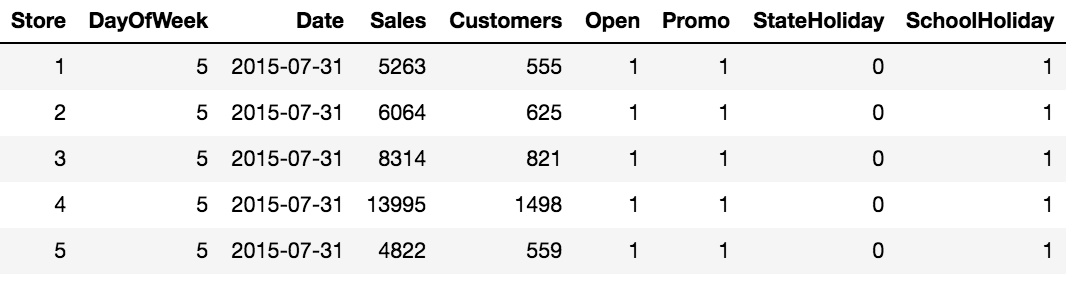

In [1]:
# importing general libraries. Other libraries will be imported as and when they are needed

# general libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Seeding to ensure consistent accuracy scores for every model iteration
from numpy.random import seed
seed(42)
import tensorflow as tf
tf.random.set_seed(42)

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

**Project Task: Week 1**

**Exploratory Data Analysis (EDA) and Linear Regression:**

1.      Transform the variables by using data manipulation techniques like, One-Hot Encoding 
2.      Perform an EDA (Exploratory Data Analysis) to see the impact of variables over Sales.
3.      Apply Linear Regression to predict the forecast and evaluate different accuracy metrices like RMSE (Root Mean Squared Error) and MAE(Mean Absolute Error) and determine which metric makes more sense. Can there be a better accuracy metric?
        1. Train a single model for all stores, using storeId as a feature.
        2. Train separate model for each store.
        3. Which performs better and Why? [In the first case, parameters are shared and not very free but not in second case]
        4. Try Ensemble of b) and c). What are the findings?
        5. Use Regularized Regression. It should perform better in an unseen test set. Any insights??
        6. Open-ended modeling to get possible predictions.

In [2]:
# read/import all datasets

train = pd.read_csv\
(r"D:\Simplilearn\07 AI Capstone Project\Project 3 Data\train_data.csv")

test = pd.read_csv\
(r"D:\Simplilearn\07 AI Capstone Project\Project 3 Data\test_data.csv")

test_val = pd.read_csv\
(r"D:\Simplilearn\07 AI Capstone Project\Project 3 Data\test_data_hidden.csv")

In [3]:
# allows for multiple pandas tables to be displayed in a single output
from IPython.display import display

print('Train Data Head ↓')
display(train.head())

print('Test Data Head ↓')
display(test.head())

print('Validation Data Head ↓')
display(test_val.head())

Train Data Head ↓


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,2,2015-06-30,5735,568,1,1,0,0
1,2,2,2015-06-30,9863,877,1,1,0,0
2,3,2,2015-06-30,13261,1072,1,1,0,1
3,4,2,2015-06-30,13106,1488,1,1,0,0
4,5,2,2015-06-30,6635,645,1,1,0,0


Test Data Head ↓


,Store,DayOfWeek,Date,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,31-07-2015,555,1,1,0,1
1,2,5,31-07-2015,625,1,1,0,1
2,3,5,31-07-2015,821,1,1,0,1
3,4,5,31-07-2015,1498,1,1,0,1
4,5,5,31-07-2015,559,1,1,0,1


Validation Data Head ↓


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
# it is observed that the Date in Test Data is in the format='%d-%m-%Y' 
# let's convert it to format='%Y-%m-%d' for consistency during our transformation/encoding step later

test['Date'] = pd.to_datetime(test['Date'], format='%d-%m-%Y').dt.strftime('%Y-%m-%d')
test.head()

,Store,DayOfWeek,Date,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,555,1,1,0,1
1,2,5,2015-07-31,625,1,1,0,1
2,3,5,2015-07-31,821,1,1,0,1
3,4,5,2015-07-31,1498,1,1,0,1
4,5,5,2015-07-31,559,1,1,0,1


In [5]:
print('Train Data Info ↓')
display(train.info())
print('=============================================')
print('Test Data Info ↓')
display(test.info())
print('=============================================')
print('Validation Data Info ↓')
display(test_val.info())

Train Data Info ↓
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982644 entries, 0 to 982643
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Store          982644 non-null  int64 
 1   DayOfWeek      982644 non-null  int64 
 2   Date           982644 non-null  object
 3   Sales          982644 non-null  int64 
 4   Customers      982644 non-null  int64 
 5   Open           982644 non-null  int64 
 6   Promo          982644 non-null  int64 
 7   StateHoliday   982644 non-null  object
 8   SchoolHoliday  982644 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 67.5+ MB


None

Test Data Info ↓
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34565 entries, 0 to 34564
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Store          34565 non-null  int64 
 1   DayOfWeek      34565 non-null  int64 
 2   Date           34565 non-null  object
 3   Customers      34565 non-null  int64 
 4   Open           34565 non-null  int64 
 5   Promo          34565 non-null  int64 
 6   StateHoliday   34565 non-null  int64 
 7   SchoolHoliday  34565 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 2.1+ MB


None

Validation Data Info ↓
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34565 entries, 0 to 34564
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Store          34565 non-null  int64 
 1   DayOfWeek      34565 non-null  int64 
 2   Date           34565 non-null  object
 3   Sales          34565 non-null  int64 
 4   Customers      34565 non-null  int64 
 5   Open           34565 non-null  int64 
 6   Promo          34565 non-null  int64 
 7   StateHoliday   34565 non-null  int64 
 8   SchoolHoliday  34565 non-null  int64 
dtypes: int64(8), object(1)
memory usage: 2.4+ MB


None

In [6]:
print('From the .info() function, we observe that StateHoliday in Train Data is listed as an object, but as int64 in Test and Validation data. This appears to be due to test & validation data containing no a, b and c objects \n')

print('Train Data Info ↓')
display(train.StateHoliday.unique())
print('=============================================')
print('Test Data Info ↓')
display(test.StateHoliday.unique())
print('=============================================')
print('Validation Data Info ↓')
display(test_val.StateHoliday.unique())

From the .info() function, we observe that StateHoliday in Train Data is listed as an object, but as int64 in Test and Validation data. This appears to be due to test & validation data containing no a, b and c objects 

Train Data Info ↓


array(['0', 'a', 'b', 'c', 0], dtype=object)

Test Data Info ↓


array([0], dtype=int64)

Validation Data Info ↓


array([0], dtype=int64)

In [7]:
# investigating the characteristics of our train data

print('Check for ISNA cells ↓')
display(train.isna().sum())

print('Store Value Count ↓')
display(train.Store.value_counts())

print('DayOfWeek Value Count ↓')
display(train.DayOfWeek.value_counts())

print('Date Unique Values ↓')
display(train.Date.unique())

print('Sales Description ↓')
display(train.Sales.describe()) # investigate plot later, as it is a continuous variable

print('Customers Description ↓')
display(train.Customers.describe()) # investigate plot later, as it is a continuous variable

print('Open Value Count ↓')
display(train.Open.value_counts())

print('Promo Value Count ↓')
display(train.Promo.value_counts())

print('StateHoliday Unique Values ↓')
display(train.StateHoliday.unique())

print('SchoolHoliday Value Count ↓')
display(train.SchoolHoliday.value_counts())

Check for ISNA cells ↓


Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

Store Value Count ↓


233     911
836     911
308     911
309     911
821     911
       ... 
778     727
677     727
952     727
1065    727
512     727
Name: Store, Length: 1115, dtype: int64

DayOfWeek Value Count ↓


2    141204
1    140270
4    140270
5    140270
6    140270
7    140270
3    140090
Name: DayOfWeek, dtype: int64

Date Unique Values ↓


array(['2015-06-30', '2015-06-29', '2015-06-28', '2015-06-27',
       '2015-06-26', '2015-06-25', '2015-06-24', '2015-06-23',
       '2015-06-22', '2015-06-21', '2015-06-20', '2015-06-19',
       '2015-06-18', '2015-06-17', '2015-06-16', '2015-06-15',
       '2015-06-14', '2015-06-13', '2015-06-12', '2015-06-11',
       '2015-06-10', '2015-06-09', '2015-06-08', '2015-06-07',
       '2015-06-06', '2015-06-05', '2015-06-04', '2015-06-03',
       '2015-06-02', '2015-06-01', '2015-05-31', '2015-05-30',
       '2015-05-29', '2015-05-28', '2015-05-27', '2015-05-26',
       '2015-05-25', '2015-05-24', '2015-05-23', '2015-05-22',
       '2015-05-21', '2015-05-20', '2015-05-19', '2015-05-18',
       '2015-05-17', '2015-05-16', '2015-05-15', '2015-05-14',
       '2015-05-13', '2015-05-12', '2015-05-11', '2015-05-10',
       '2015-05-09', '2015-05-08', '2015-05-07', '2015-05-06',
       '2015-05-05', '2015-05-04', '2015-05-03', '2015-05-02',
       '2015-05-01', '2015-04-30', '2015-04-29', '2015-

Sales Description ↓


count    982644.000000
mean       5760.843202
std        3857.573443
min           0.000000
25%        3705.000000
50%        5731.000000
75%        7847.000000
max       41551.000000
Name: Sales, dtype: float64

Customers Description ↓


count    982644.000000
mean        632.770227
std         465.401378
min           0.000000
25%         403.000000
50%         609.000000
75%         838.000000
max        7388.000000
Name: Customers, dtype: float64

Open Value Count ↓


1    814204
0    168440
Name: Open, dtype: int64

Promo Value Count ↓


0    609059
1    373585
Name: Promo, dtype: int64

StateHoliday Unique Values ↓


array(['0', 'a', 'b', 'c', 0], dtype=object)

SchoolHoliday Value Count ↓


0    813700
1    168944
Name: SchoolHoliday, dtype: int64

#### Investigating Independent Variable: Store

In [8]:
train_store_plt = pd.DataFrame(train.Store).sort_values('Store')
train_store_plt

,Store
0,1
756300,1
757415,1
121535,1
758530,1
...,...
381659,1115
445214,1115
290639,1115
653719,1115


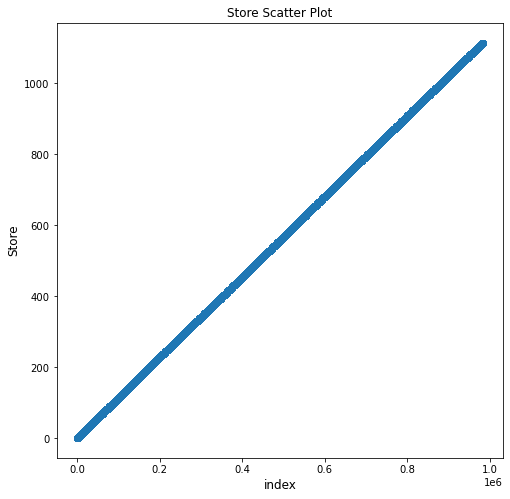

Independent variable Store is simply a group of numbered stores from 1 to 1115 . No transformation appears necessary


None

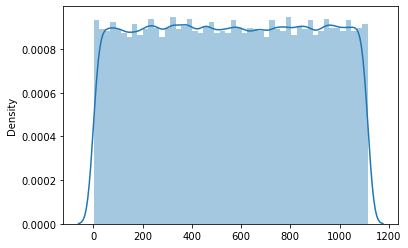

In [9]:
# scatter plot
plt.figure(figsize=(8,8))
plt.scatter(range(train_store_plt.shape[0]),train_store_plt.Store.values) #np.sort(train_store_plt.Store.values)
plt.xlabel('index', fontsize=12)
plt.ylabel('Store', fontsize=12)
plt.title('Store Scatter Plot')
plt.show()

# histogram
sns.distplot(train_store_plt)

# conclusion:
display(print('Independent variable Store is simply a group of numbered stores from', train_store_plt.min()[0], 'to', train_store_plt.max()[0],'. No transformation appears necessary'))

#### Investigating Dependent Variables: Sales & Customers

In [10]:
# let's plot these two continuous variables to visualize their distribution
train_sales_plt = pd.DataFrame(train.Sales).sort_values('Sales')
train_customers_plt = pd.DataFrame(train.Customers).sort_values('Customers')

display(train_sales_plt)
display(train_customers_plt)

,Sales
982643,0
375282,0
375281,0
375280,0
703581,0
...,...
389521,38037
52666,38367
67161,38484
98381,38722


,Customers
982643,0
703457,0
703456,0
703454,0
703453,0
...,...
409796,5297
397531,5387
67161,5458
285245,5494


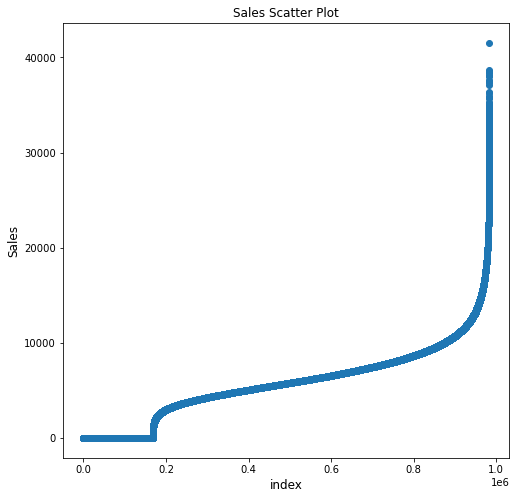

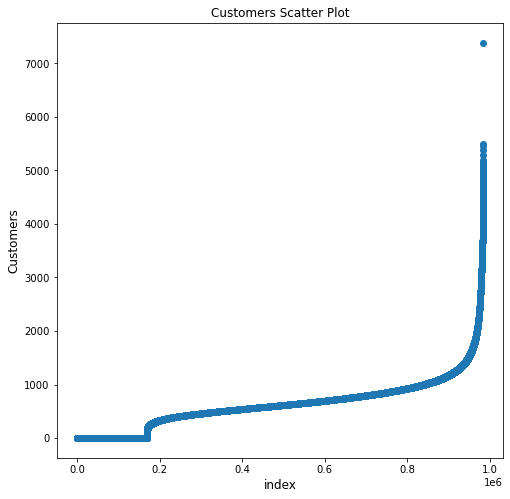

A notable outlier exists, although we will leave it in as it does not appear extreme for sales


In [11]:
# Scatter Plots of sorted sales/customer data:

# plot train_sales_plt
plt.figure(figsize=(8,8))
plt.scatter(range(train_sales_plt.shape[0]),train_sales_plt.Sales.values) #np.sort(train_sales_plt.Sales.values)
plt.xlabel('index', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.title('Sales Scatter Plot')
plt.show()

# plot train_customers_plt
plt.figure(figsize=(8,8))
plt.scatter(range(train_customers_plt.shape[0]),train_customers_plt.Customers.values) #np.sort(train_customers_plt.Customers.values)
plt.xlabel('index', fontsize=12)
plt.ylabel('Customers', fontsize=12)
plt.title('Customers Scatter Plot')
plt.show()

print('A notable outlier exists, although we will leave it in as it does not appear extreme for sales')

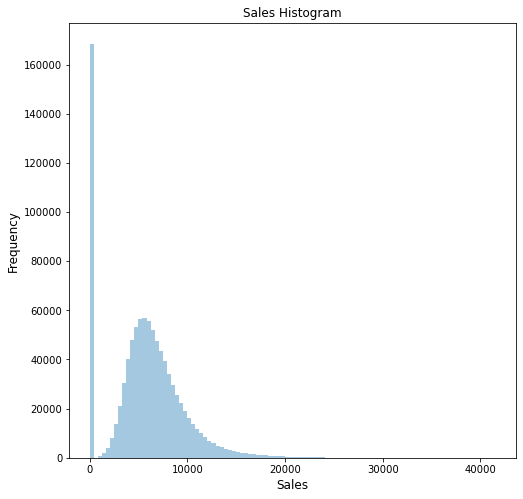

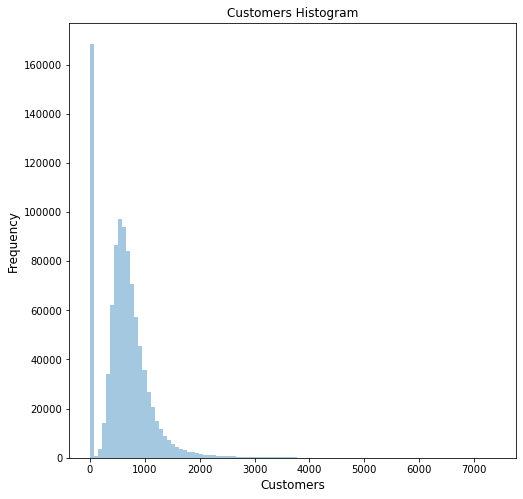

In [12]:
# Historgrams:

# The histogram of Sales shows strong right-skewedness & high frequency of 0 values
plt.figure(figsize=(8,8))
sns.distplot(train_sales_plt.Sales.values, bins=100, kde=False)
plt.xlabel('Sales', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Sales Histogram')
plt.show()

# The histogram of Customers shows strong right-skewedness & high frequency of 0 values
plt.figure(figsize=(8,8))
sns.distplot(train_customers_plt.Customers.values, bins=100, kde=False)
plt.xlabel('Customers', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Customers Histogram')
plt.show()

In [13]:
# Given the strong right/positive skewedness in Sales and Customer data, we should perform a transformation to reduce it
display(train_sales_plt['Sales'].skew())
display(train_customers_plt ['Customers'].skew())

0.6459569808512857

1.5894390318899005

-1.6894933186729897

<AxesSubplot:xlabel='Sales', ylabel='Density'>

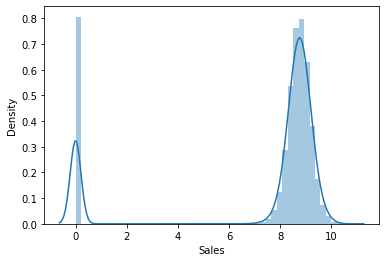

In [14]:
# log transform

# transform with log(1+x) due to presence of 0 values, which would cause a regular log(x) to return (-)infinity
sales_log = np.log1p(train_sales_plt['Sales'])
display(sales_log.skew())
display(sns.distplot(sales_log))

-0.8884451483687044

<AxesSubplot:xlabel='Sales', ylabel='Density'>

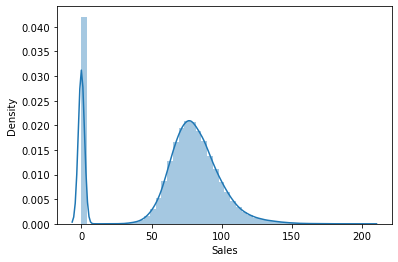

In [15]:
# sqrt transform

sales_sqrt = np.sqrt(train_sales_plt['Sales'])
display(sales_sqrt.skew())
display(sns.distplot(sales_sqrt))

λ for boxcox1p is [0.46983636]


None

-0.9537578651373185

<AxesSubplot:ylabel='Density'>

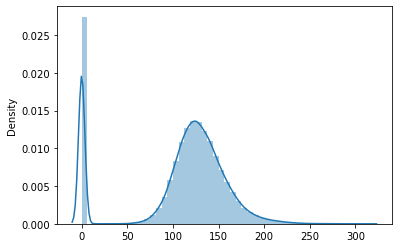

In [16]:
# box-cox transform

# again, transform with boxcox(1+x) due to presence of 0 values
from scipy import stats
from scipy.special import boxcox1p

# to determine lambda (λ) for boxcox1p function
# https://stackoverflow.com/questions/63105754/how-do-i-calculate-lambda-to-use-scipy-special-boxcox1p-function-for-my-entire-d
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
# Note method 'yeo-johnson' is used because it works with both positive and negative values
pt.fit(train_sales_plt)
display(print('λ for boxcox1p is', pt.lambdas_))

# perform transformation
# λ = 0.795 gives the lowest skew but visually still presents postive/right skewedness due to large count of zeroes
# so we proceed with λ = 0.46983636 as calculated with PowerTransformer
sales_boxcox = train_sales_plt.apply(lambda x: boxcox1p(x, 0.46983636))  
display(sales_boxcox.skew()[0])
display(sns.distplot(sales_boxcox))

In [17]:
print('Sales Skewness Score - Base Data: ', train_sales_plt['Sales'].skew())
print('Sales Skewness Score - log:      ', sales_log.skew())
print('Sales Skewness Score - sqrt:     ', sales_sqrt.skew())
print('Sales Skewness Score - boxcox:   ', sales_boxcox.skew()[0])

# none of these popular transformation methods appear to adequately reduce the skewness, mainly due
# to the fact that it is zero-inflated, indicating the distribution of the variable contains many 0's
# therefore, accuracy linear regressions (prerequisites of which require normal dist.) may suffer
# https://towardsdatascience.com/avoid-mistakes-in-machine-learning-models-with-skewed-count-data-e3512b94d745
print('\n')
print('None of these popular transformation methods appear to adequately limit the skewness, mainly due to the fact that the data is zero-inflated. This significant proportion of zero values in Sales and Customers data causes non-normal distrubtion, thus potentially impacting the accuracy that a standard linear regression model using this data may produce.' + '\n\n \033[1m' + ' As a result, we will simply attempt to apply a zero-inflated regression during our modelling steps later on.'+ '\n \033[0;0m')
# see:
# https://towardsdatascience.com/avoid-mistakes-in-machine-learning-models-with-skewed-count-data-e3512b94d745
# https://towardsdatascience.com/zero-inflated-regression-c7dfc656d8af

sales_count_0 = train_sales_plt.Sales.value_counts(normalize=True)
customer_count_0 = train_customers_plt.Customers.value_counts(normalize=True)
print('Proportion of Sales that are zero :     %0.2f%%' % (sales_count_0[0]*100))
print('Proportion of Customers that are zero : %0.2f%%' % (sales_count_0[0]*100) + '\n')

Sales Skewness Score - Base Data:  0.6459569808512857
Sales Skewness Score - log:       -1.6894933186729897
Sales Skewness Score - sqrt:      -0.8884451483687044
Sales Skewness Score - boxcox:    -0.9537578651373185


None of these popular transformation methods appear to adequately limit the skewness, mainly due to the fact that the data is zero-inflated. This significant proportion of zero values in Sales and Customers data causes non-normal distrubtion, thus potentially impacting the accuracy that a standard linear regression model using this data may produce.

  As a result, we will simply attempt to apply a zero-inflated regression during our modelling steps later on.
 
Proportion of Sales that are zero :     17.15%
Proportion of Customers that are zero : 17.15%



#### Investigating Dependent Variables: Variable Relationships

<AxesSubplot:>

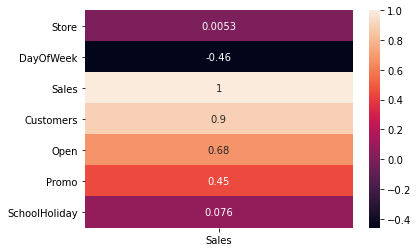

In [18]:
# correlation analysis
correlation_matrix = pd.DataFrame(train.corr()['Sales'])
sns.heatmap(correlation_matrix, annot=True)

# alternative display:
# display(correlation_matrix.style.background_gradient(cmap='coolwarm').set_precision(2))

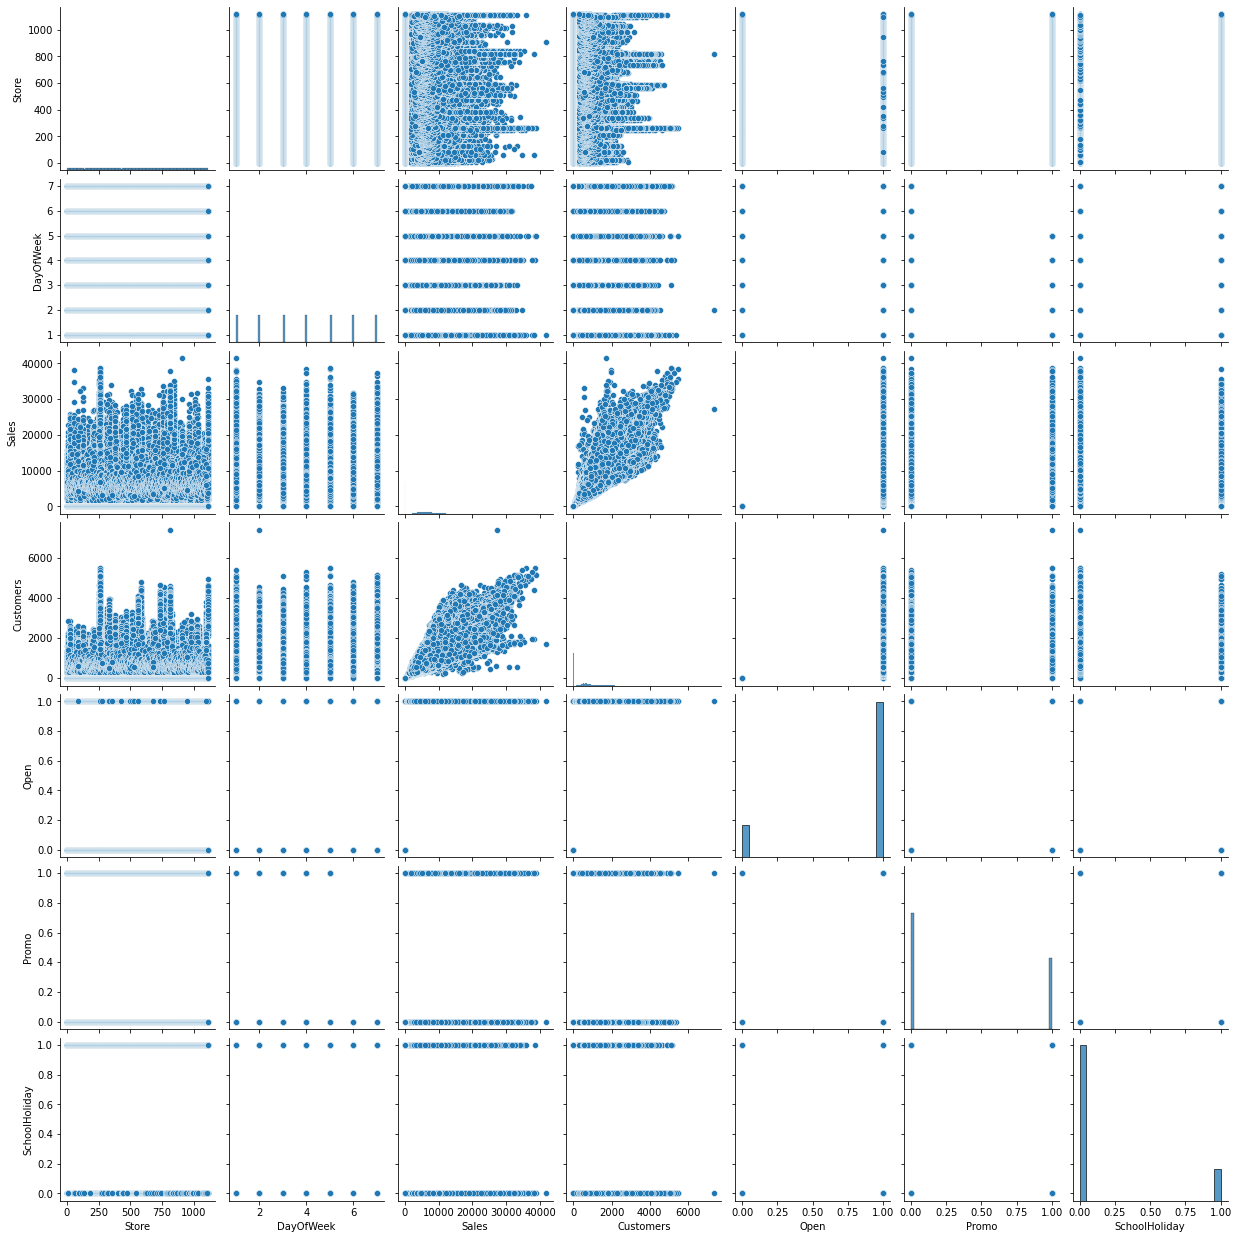

In [19]:
# let's also investigate some pairplots to determine any interesting relationships
sns.pairplot(train)     #sns.pairplot(train, hue = 'DayOfWeek')

In [20]:
print('Insights:')
print("\n 1. Sales is strongly positively correlated with 'Customers' and 'Open'. This is naturally due to the fact that sales can only occur when stores are open and customers are present.")
print("\n 2. At the same time, there is a moderate positive correlation with 'Promo', as customers are likely to make more purchases during promotional sales periods.")
print("\n 3. However, the 'DayofWeek' has a moderately negative correlation, which supports the notion that certain days of the week sees more sales than others; possibly as customers may tend to have more time to shop on weekends vs weekdays, or may prefer to shop during days when promotions are available at the stores. We investigate this a little further below.)")

Insights:

 1. Sales is strongly positively correlated with 'Customers' and 'Open'. This is naturally due to the fact that sales can only occur when stores are open and customers are present.

 2. At the same time, there is a moderate positive correlation with 'Promo', as customers are likely to make more purchases during promotional sales periods.

 3. However, the 'DayofWeek' has a moderately negative correlation, which supports the notion that certain days of the week sees more sales than others; possibly as customers may tend to have more time to shop on weekends vs weekdays, or may prefer to shop during days when promotions are available at the stores. We investigate this a little further below.)


1 = Monday, 7 = Sunday


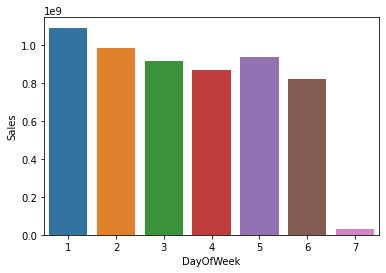

In [21]:
sales_by_day = train.groupby(['DayOfWeek'])['Sales'].sum().reset_index()
sns.barplot(x = 'DayOfWeek', y = 'Sales', data = sales_by_day)
print("1 = Monday, 7 = Sunday")

In [22]:
sales_by_day = train.groupby(['SchoolHoliday'])['Sales'].sum().reset_index()
sales_by_day

,SchoolHoliday,Sales
0,0,4578696753
1,1,1082161254


In [23]:
print('Additional Insights:')
print("\n 1. Sales tends to peak on day 1, 2 and 5 of the week, indicating that customers prefer shopping on the grouped days of Mon-Tue (1-2) and Fri (5). Alternatively, we observe the lowest sales on Sunday (7), which is primarily due to store closure for most stores on this day")
print("\n 2. School holidays also reduecs sales performance. This may be due to the fact that families may prefer to spend time with their children at home during such holidays, or may not have sufficient time to go out shopping due to the need to take care of children at home")

Additional Insights:

 1. Sales tends to peak on day 1, 2 and 5 of the week, indicating that customers prefer shopping on the grouped days of Mon-Tue (1-2) and Fri (5). Alternatively, we observe the lowest sales on Sunday (7), which is primarily due to store closure for most stores on this day

 2. School holidays also reduecs sales performance. This may be due to the fact that families may prefer to spend time with their children at home during such holidays, or may not have sufficient time to go out shopping due to the need to take care of children at home


#### Feature Engineering

In [24]:
# Now let's start encoding our variables where necessary. We begin by combining all 3 datasets, so that any encoding will include all categories present in all sets for consistency.
# We will need to separate the data again later using the indexes, so we take note of their length & shape ahead of time

length_train = len(train.index)
length_test = len(test.index)
length_test_val = len(test_val.index)

display(length_train)
display(length_test)
display(length_test_val)

print(train.shape)
combi = train.append(test, ignore_index=True)
print(combi.shape)
combi = combi.append(test_val , ignore_index=True)
print(combi.shape)

display(combi)

982644

34565

34565

(982644, 9)
(1017209, 9)
(1051774, 9)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,2,2015-06-30,5735.0,568,1,1,0,0
1,2,2,2015-06-30,9863.0,877,1,1,0,0
2,3,2,2015-06-30,13261.0,1072,1,1,0,1
3,4,2,2015-06-30,13106.0,1488,1,1,0,0
4,5,2,2015-06-30,6635.0,645,1,1,0,0
...,...,...,...,...,...,...,...,...,...
1051769,1111,3,2015-07-01,3701.0,351,1,1,0,1
1051770,1112,3,2015-07-01,10620.0,716,1,1,0,1
1051771,1113,3,2015-07-01,8222.0,770,1,1,0,0
1051772,1114,3,2015-07-01,27071.0,3788,1,1,0,0


In [25]:
# For regressions, dates can either be converted into an ordinal value, dummy variables or timedeltas.
# 1. Convert to dummy variable/factor to get fixed-day effects / analyzing dates as a day of the year (x of 365)
# 2. Convert to timedeltas so first day is 0 to get linear effect since days of origin (earliest date in dataset)
# 3. Ordinal values serves as similar to timedeltas, resulting in a number output. However, the values are usually large, which can lead to issues with interpreting its intercept in regressions. For this reason we also should convert year away from eg: 2020, 2021 into eg: 2020:1 and 2021:2, since an intercept of year 0 means little and it is harder to interpret.
# 4. Additionally, we could also generate additional variables like whether its a weekend or holiday - although this dataset largely has done this already with StateHoliday, SchoolHoliday and DayOfWeek

# Thus for our dataset, let's try two variations. We will try both timedeltas and dummy variables to handle our dates. 

# Creating dummy variables for dates
combi['year'] = pd.to_datetime(combi['Date'],format='%Y-%m-%d').dt.year 
combi['month'] = pd.to_datetime(combi['Date'],format='%Y-%m-%d').dt.month 
combi['day'] = pd.to_datetime(combi['Date'],format='%Y-%m-%d').dt.day
combi['year'] = combi.year.replace({2013 : 0, 2014 : 1 , 2015 : 2 })  # replace year with discrete values
# It was noted that test data Dates format was initially flipped as format='%d-%m-%Y'. This was corrected to '%Y-%m-%d' earlier duing EDA.

# Creating a new timedelta column
combi['date_delta'] = pd.to_datetime(combi['Date'], format='%Y-%m-%d')
combi['date_delta'] = ((combi['date_delta']-combi['date_delta'].min())/np.timedelta64(1,'D')) + 1

# Finally, we also address the StateHoliday variable by converting it from object/string to discrete values
combi['StateHoliday'] = combi.StateHoliday.replace({'0' : 0, 'a' : 1 , 'b' : 2 ,'c' : 3})

# We now have our 'base' data
display(combi)
display(combi.info())

# plt.figure(figsize=(10,10))
# sns.heatmap(combi1.corr(), annot=True)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,year,month,day,date_delta
0,1,2,2015-06-30,5735.0,568,1,1,0,0,2,6,30,911.0
1,2,2,2015-06-30,9863.0,877,1,1,0,0,2,6,30,911.0
2,3,2,2015-06-30,13261.0,1072,1,1,0,1,2,6,30,911.0
3,4,2,2015-06-30,13106.0,1488,1,1,0,0,2,6,30,911.0
4,5,2,2015-06-30,6635.0,645,1,1,0,0,2,6,30,911.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1051769,1111,3,2015-07-01,3701.0,351,1,1,0,1,2,7,1,912.0
1051770,1112,3,2015-07-01,10620.0,716,1,1,0,1,2,7,1,912.0
1051771,1113,3,2015-07-01,8222.0,770,1,1,0,0,2,7,1,912.0
1051772,1114,3,2015-07-01,27071.0,3788,1,1,0,0,2,7,1,912.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1051774 entries, 0 to 1051773
Data columns (total 13 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   Store          1051774 non-null  int64  
 1   DayOfWeek      1051774 non-null  int64  
 2   Date           1051774 non-null  object 
 3   Sales          1017209 non-null  float64
 4   Customers      1051774 non-null  int64  
 5   Open           1051774 non-null  int64  
 6   Promo          1051774 non-null  int64  
 7   StateHoliday   1051774 non-null  int64  
 8   SchoolHoliday  1051774 non-null  int64  
 9   year           1051774 non-null  int64  
 10  month          1051774 non-null  int64  
 11  day            1051774 non-null  int64  
 12  date_delta     1051774 non-null  float64
dtypes: float64(2), int64(10), object(1)
memory usage: 104.3+ MB


None

In [26]:
# From our combi base data, we need to split into two datasets. 
# One to run a model for all stores, and one to run a model for each store

# Train a single model for all stores, using storeId as a feature.
combi1 = pd.get_dummies(combi, columns=['Store','DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday','year','month','day'],drop_first=True)
display(combi1.head())

# Train separate model for each store.
combi2 = pd.get_dummies(combi, columns=['DayOfWeek','Open', 'Promo','StateHoliday','SchoolHoliday','year','month','day'],drop_first=True)
display(combi2.head())

,Date,Sales,Customers,date_delta,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,...,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31
0,2015-06-30,5735.0,568,911.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2015-06-30,9863.0,877,911.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2015-06-30,13261.0,1072,911.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2015-06-30,13106.0,1488,911.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2015-06-30,6635.0,645,911.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


,Store,Date,Sales,Customers,date_delta,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,...,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31
0,1,2015-06-30,5735.0,568,911.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2,2015-06-30,9863.0,877,911.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,3,2015-06-30,13261.0,1072,911.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,4,2015-06-30,13106.0,1488,911.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,5,2015-06-30,6635.0,645,911.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [27]:
# now to split our combined datasets back into train, test and validation sets for modelling.

# length_train = len(train.index)
# length_test = len(test.index)
# length_test_val = len(test_val.index)
    
train1 = combi1.iloc[:length_train].reset_index(drop=True)
test1 = combi1.iloc[length_train:(length_train+length_test)].reset_index(drop=True)
test_val1 = combi1.iloc[(length_train+length_test):].reset_index(drop=True)

# display(train1.shape)
# display(train1.head())
# display(test1.shape)
# display(test1.head())
# display(test_val1.shape)
# display(test_val1.head())

train2 = combi2.iloc[:length_train].reset_index(drop=True)
test2 = combi2.iloc[length_train:(length_train+length_test)].reset_index(drop=True)
test_val2 = combi2.iloc[(length_train+length_test):].reset_index(drop=True)

# display(train2.shape)
# display(train2.head())
# display(test2.shape)
# display(test2.head())
# display(test_val2.shape)
# display(test_val2.head())

In [28]:
%%time

# check for multicollinearity on independent variables with Variance Inflation Factor
# Detecting and removing high VIF items is required to reduce multicollinearity ahead of running a linear regression
# Reason: Multicollinearity may not affect the accuracy of the model as much. 
# But we might lose reliability in determining the effects of individual features in your model – 
# and that can be a problem when it comes to interpretability.

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# 'variance_inflation_factor' expects the presence of a constant in the matrix of explanatory variables. 
# One can use add_constant from statsmodels to add the required constant to the dataframe before passing its values to the function
# https://stackoverflow.com/questions/42658379/variance-inflation-factor-in-python

#====================================================================================================================

# # VIF on train
# A = train._get_numeric_data() # VIF can not be done on str (such as Date)
# A_1 = add_constant(A) # adding constant
# A_VIF = pd.DataFrame([variance_inflation_factor(A_1.values, i) for i in range(A_1.shape[1])], index = A_1.columns)
# A_VIF.rename({0: 'Train_VIF'}, axis=1, inplace=True)
# display(A_VIF)

# # VIF on train1
# B = train1._get_numeric_data() 
# B_1 = add_constant(B)
# B_VIF = pd.DataFrame([variance_inflation_factor(B_1.values, i) for i in range(B_1.shape[1])], index = B_1.columns)
# B_VIF.rename({0: 'Train1_VIF'}, axis=1, inplace=True)
# display(B_VIF)

# # VIF on train2
# C = train2._get_numeric_data()
# C_1 = add_constant(C)
# C_VIF = pd.DataFrame([variance_inflation_factor(C_1.values, i) for i in range(C_1.shape[1])], index = C_1.columns)
# C_VIF.rename({0: 'Train2_VIF'}, axis=1, inplace=True)
# display(C_VIF)

#====================================================================================================================

# VIF on modified train as proxy for train1 and train2
# For this step, we re-run some date and dummy encodings to mimic some pertinent train1 and train2 variables
temp_vif = train
temp_vif['year'] = pd.to_datetime(temp_vif['Date'],format='%Y-%m-%d').dt.year 
temp_vif['month'] = pd.to_datetime(temp_vif['Date'],format='%Y-%m-%d').dt.month 
temp_vif['day'] = pd.to_datetime(temp_vif['Date'],format='%Y-%m-%d').dt.day
temp_vif['year'] = temp_vif.year.replace({2013 : 0, 2014 : 1 , 2015 : 2 })
temp_vif['StateHoliday'] = temp_vif.StateHoliday.replace({'0' : 0, 'a' : 1 , 'b' : 2 ,'c' : 3})
temp_vif = pd.get_dummies(temp_vif, columns=['DayOfWeek','StateHoliday','SchoolHoliday'],drop_first=True)

A_0 = temp_vif._get_numeric_data()
A_01 = add_constant(A_0)
A_0_VIF = pd.DataFrame([variance_inflation_factor(A_0.values, i) for i in range(A_0.shape[1])], index = A_0.columns)
A_0_VIF.rename({0: 'Train_proxy_VIF'}, axis=1, inplace=True)
display(A_0_VIF)

print("1. Running VIF on train1 and train2 exceeded my machine's memory constraints. As a result, I have instead selected a few important base-and-encoded variables run VIF on as a proxy\n")
print("2. In this proxy VIF, we do note that Customers in the base train data has a very high correlation with Customers (VIF>5). Therefore, Customers will be removed prior to running any regressions. \n")
print("3. Furthermore, Open also has (VIF>5) and should also be dropped. However, this assignment addresses this need in Project Task: Week 2 steps, so we shall action on this later. \n") 
print("4. Alternatively, a ridge regression could be performed instead in instances of multicollinearity. \n") 

,Train_proxy_VIF
Store,3.945447
Sales,22.864662
Customers,15.460803
Open,21.369814
Promo,2.605177
year,2.284384
month,4.388005
day,4.256987
DayOfWeek_2,2.011783
DayOfWeek_3,2.025217


1. Running VIF on train1 and train2 exceeded my machine's memory constraints. As a result, I have instead selected a few important base-and-encoded variables run VIF on as a proxy

2. In this proxy VIF, we do note that Customers in the base train data has a very high correlation with Customers (VIF>5). Therefore, Customers will be removed prior to running any regressions. 

3. Furthermore, Open also has (VIF>5) and should also be dropped. However, this assignment addresses this need in Project Task: Week 2 steps, so we shall action on this later. 

4. Alternatively, a ridge regression could be performed instead in instances of multicollinearity. 

Wall time: 32.1 s


### Export processed base files to CSV

In [29]:
%%time

train1.to_csv(r"D:\Simplilearn\07 AI Capstone Project\Project 3 Data\toCSV\train1.csv", index=False)
test1.to_csv(r"D:\Simplilearn\07 AI Capstone Project\Project 3 Data\toCSV\test1.csv", index=False)
test_val1.to_csv(r"D:\Simplilearn\07 AI Capstone Project\Project 3 Data\toCSV\test_val1.csv", index=False)

train2.to_csv(r"D:\Simplilearn\07 AI Capstone Project\Project 3 Data\toCSV\train2.csv", index=False)
test2.to_csv(r"D:\Simplilearn\07 AI Capstone Project\Project 3 Data\toCSV\test2.csv", index=False)
test_val2.to_csv(r"D:\Simplilearn\07 AI Capstone Project\Project 3 Data\toCSV\test_val2.csv", index=False)

Wall time: 3min 12s


In [1]:
# Notes:
# after modelling make sure residuals are distributed normally: https://www.statsimprove.com/en/linear-regression-should-dependent-and-independent-variables-be-distributed-normally/
# # test data and validation data StateHoliday is 0, consider removing as variance is also thus 0